In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install selectivesearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4350 sha256=7da08466c71ffe0cfb78cea9b702841076bc218d30ae9604db27089d6cc5102e
  Stored in directory: /root/.cache/pip/wheels/66/4e/88/6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch


In [1]:
import selectivesearch
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np 

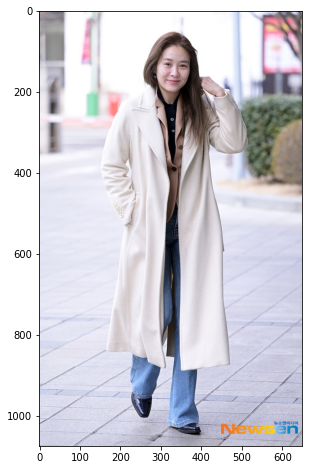

In [9]:
img = cv2.imread('./683705.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [10]:
selectivesearch.selective_search?

In [28]:
_, regions = selectivesearch.selective_search(img_rgb, scale=500, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 119


# IOU 추출

In [29]:
cand_rects = [cand['rect'] for cand in regions]

In [30]:
print(cand_rects)

[(0, 0, 163, 930), (98, 0, 286, 324), (385, 0, 262, 931), (468, 0, 181, 1074), (1, 1, 97, 924), (0, 1, 501, 1050), (230, 1, 125, 49), (384, 1, 125, 928), (540, 1, 108, 1034), (2, 2, 160, 753), (344, 2, 150, 52), (155, 3, 70, 172), (513, 3, 32, 203), (260, 51, 242, 880), (230, 59, 95, 182), (366, 59, 80, 126), (168, 60, 59, 869), (229, 60, 91, 859), (293, 60, 154, 444), (419, 60, 30, 868), (450, 60, 47, 180), (169, 61, 56, 139), (283, 83, 88, 145), (19, 166, 33, 91), (450, 179, 48, 749), (230, 186, 127, 365), (400, 192, 47, 685), (502, 267, 6, 661), (2, 269, 62, 87), (345, 310, 100, 600), (449, 340, 48, 404), (512, 435, 135, 337), (289, 469, 150, 494), (388, 510, 59, 419), (447, 529, 51, 487), (298, 548, 12, 290), (512, 611, 135, 175), (2, 744, 160, 175), (512, 775, 135, 100), (512, 781, 135, 139), (291, 810, 42, 117), (2, 836, 161, 92), (229, 849, 97, 88), (285, 903, 123, 115), (502, 916, 134, 103), (561, 920, 86, 47), (385, 930, 62, 91), (167, 931, 60, 117), (228, 931, 59, 115), (449,

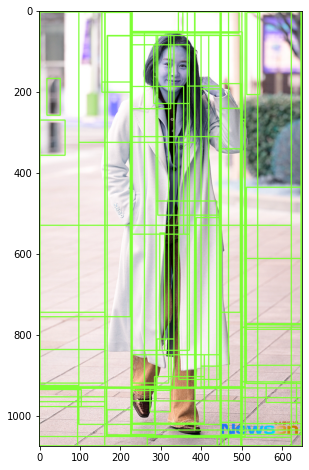

In [31]:
green_rgb = (125, 255, 51)
image_copy = img.copy()
for rect in cand_rects:
    
    left = rect[0] # 왼쪽 모서리 x 좌표 = xmin
    top = rect[1] # 왼쪽 모서리 y좌표 = ymin
    right = left + rect[2] # 왼쪽모서리 좌표 + 너비 = xmax
    bottom = top + rect[3] # 왼쪽모서리 좌표 + 높이 = ymax
    
    image_copy = cv2.rectangle(img, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(image_copy)
plt.show()

In [32]:
import numpy as np 

def compute_iou(cand_box, gt_box):
    # GT cand box 교집합
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    # GT cand box 합집합 
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

In [33]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 1000]
cand_rects.sort()
cand_rects

[(0, 0, 163, 930),
 (0, 0, 163, 930),
 (0, 0, 163, 930),
 (0, 0, 163, 930),
 (0, 0, 163, 930),
 (0, 0, 163, 930),
 (0, 0, 227, 930),
 (0, 0, 501, 1051),
 (0, 0, 501, 1051),
 (0, 0, 509, 1051),
 (0, 0, 623, 1074),
 (0, 0, 649, 1074),
 (0, 0, 649, 1074),
 (0, 0, 649, 1074),
 (0, 0, 649, 1074),
 (0, 0, 649, 1074),
 (0, 1, 501, 1050),
 (0, 529, 623, 545),
 (0, 931, 623, 143),
 (0, 931, 623, 143),
 (0, 931, 623, 143),
 (0, 932, 162, 33),
 (0, 932, 162, 45),
 (0, 935, 104, 42),
 (0, 953, 162, 121),
 (1, 1, 97, 924),
 (2, 2, 160, 753),
 (2, 2, 223, 753),
 (2, 2, 225, 927),
 (2, 269, 62, 87),
 (2, 744, 160, 175),
 (2, 836, 161, 92),
 (19, 166, 33, 91),
 (95, 931, 403, 143),
 (95, 931, 406, 143),
 (95, 931, 528, 143),
 (95, 931, 528, 143),
 (95, 932, 373, 142),
 (98, 0, 286, 324),
 (98, 0, 349, 1021),
 (155, 3, 70, 172),
 (155, 3, 70, 197),
 (166, 932, 335, 117),
 (167, 931, 60, 117),
 (167, 931, 60, 117),
 (168, 60, 59, 869),
 (168, 985, 58, 62),
 (169, 61, 56, 139),
 (228, 931, 59, 115),
 (22

img shape: (1075, 650, 3)
index: 5 iou: 0.6323638437410892 rectangle: (0, 1, 501, 1051)
index: 13 iou: 0.6245552396123327 rectangle: (260, 51, 502, 931)
index: 75 iou: 0.6297755933324315 rectangle: (229, 60, 447, 1021)
index: 76 iou: 0.6297755933324315 rectangle: (229, 60, 447, 1021)
index: 87 iou: 0.6611124683048463 rectangle: (230, 1, 509, 929)
index: 88 iou: 0.6472989024139748 rectangle: (260, 51, 502, 963)
index: 91 iou: 0.6297755933324315 rectangle: (229, 60, 447, 1021)
index: 94 iou: 0.6472989024139748 rectangle: (260, 51, 502, 963)
index: 95 iou: 0.7278212669481313 rectangle: (230, 51, 502, 963)
index: 101 iou: 0.6517011238540907 rectangle: (98, 0, 447, 1021)
index: 110 iou: 0.526829268292683 rectangle: (230, 0, 648, 1035)
index: 111 iou: 0.6317621654882433 rectangle: (0, 0, 501, 1051)
index: 113 iou: 0.6317621654882433 rectangle: (0, 0, 501, 1051)
index: 114 iou: 0.6218327011976619 rectangle: (0, 0, 509, 1051)


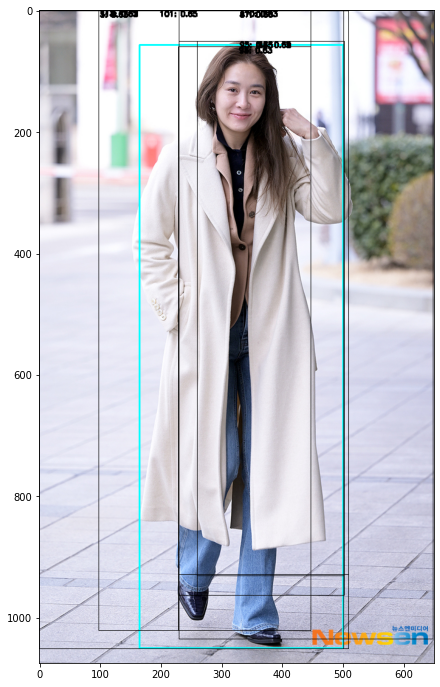

In [35]:
img = cv2.imread('./683705.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (0, 0, 0)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 1000]
gt_box = [165, 57,500,1050]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=(0,255,255), thickness=2)

for index, cand_box in enumerate(cand_rects):
    
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=2)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()